In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import requests

# Load the dataset from the local file
df = pd.read_csv('netflix_titles.csv')

print("Original Dataset:")
df.head()

Original Dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


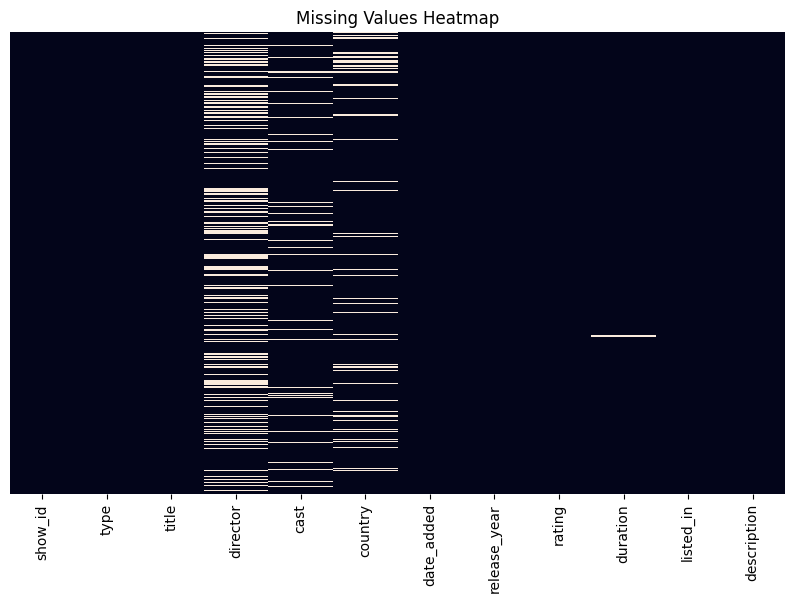

In [33]:
# Check for general information about the dataset (data types, non-null counts)
df.info()

# Check for missing values
df.isnull().sum()

# Display basic statistics for numeric columns
df.describe()

# Display basic statistics for categorical columns
df.describe(include=['object'])

# Visualize missing values in the dataset (Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()



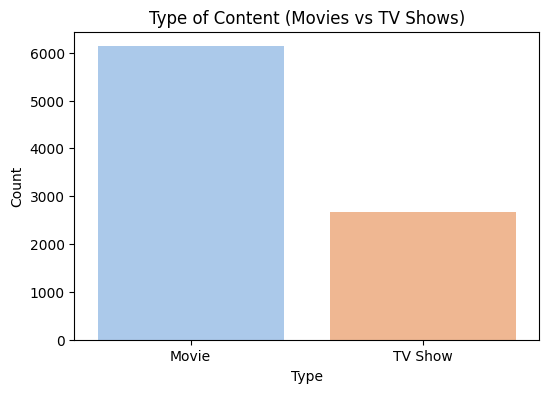

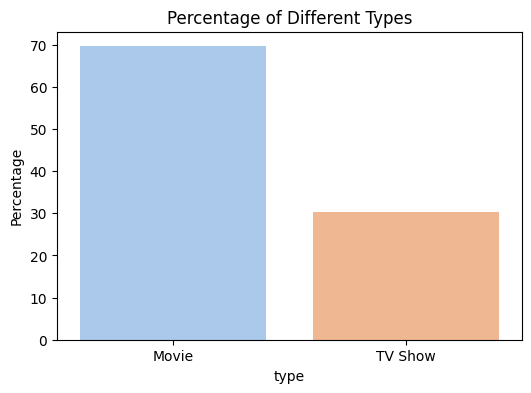

In [34]:
# Explore the distribution of 'type' (movie or TV show)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='pastel', hue='type')
plt.title('Type of Content (Movies vs TV Shows)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

type_counts = df['type'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel', hue=type_counts.index)
plt.title('Percentage of Different Types')
plt.ylabel('Percentage')
plt.show()

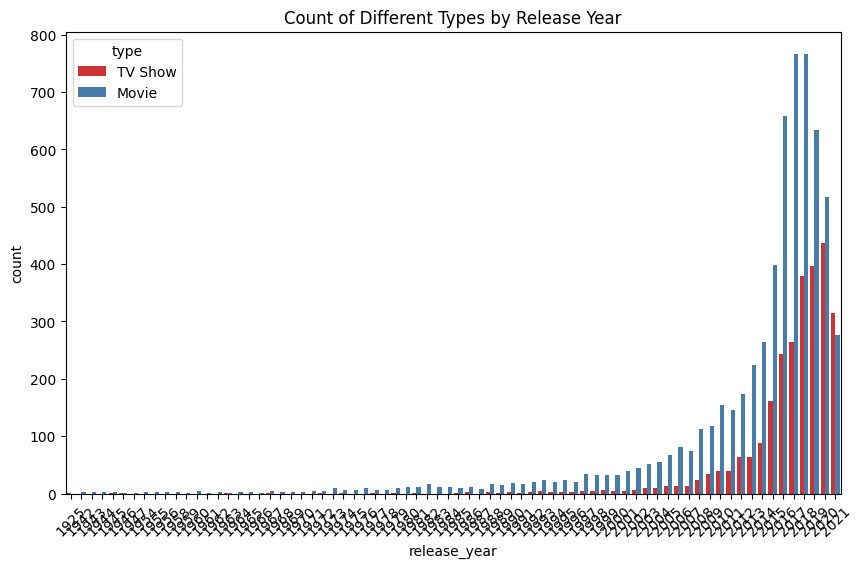

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='release_year', hue='type', palette='Set1')
plt.title('Count of Different Types by Release Year')
plt.xticks(rotation=45)
plt.show()


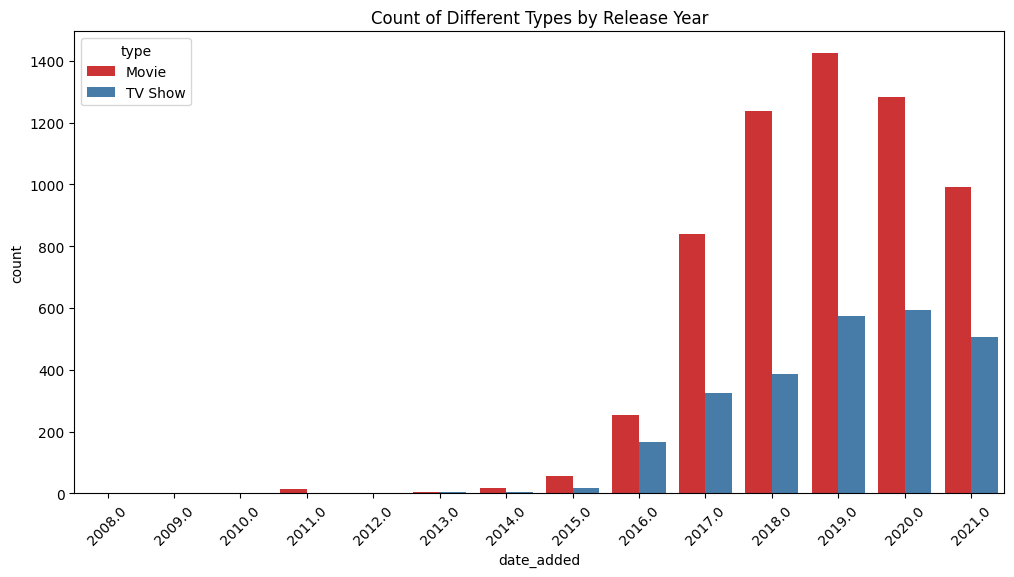

In [36]:
# Convert 'date_added' column to datetime 
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=df['date_added'].dt.year, hue='type', palette='Set1')
plt.title('Count of Different Types by Release Year')
plt.xticks(rotation=45)
plt.show()


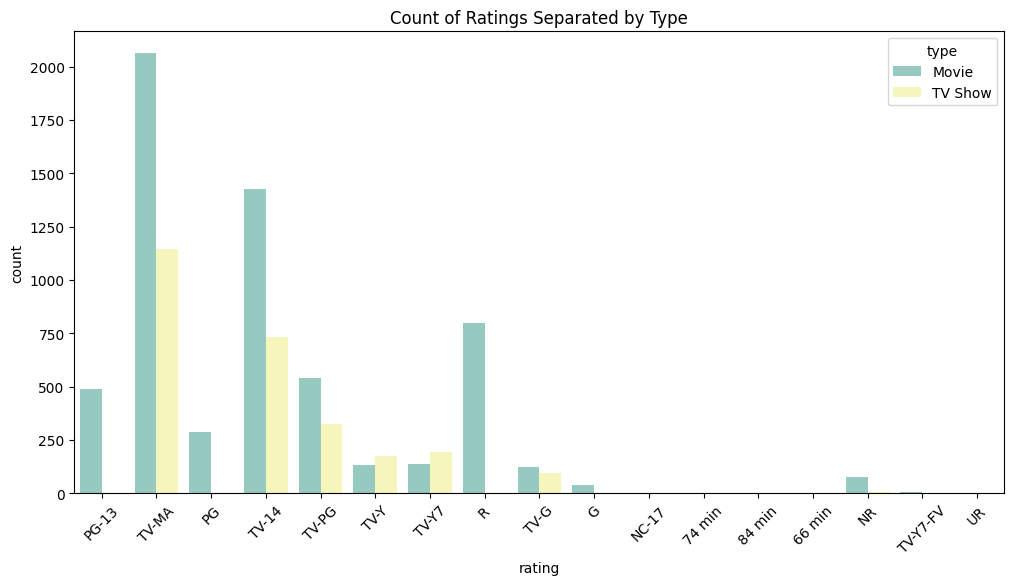

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', palette='Set3')
plt.title('Count of Ratings Separated by Type')
plt.xticks(rotation=45)
plt.show()


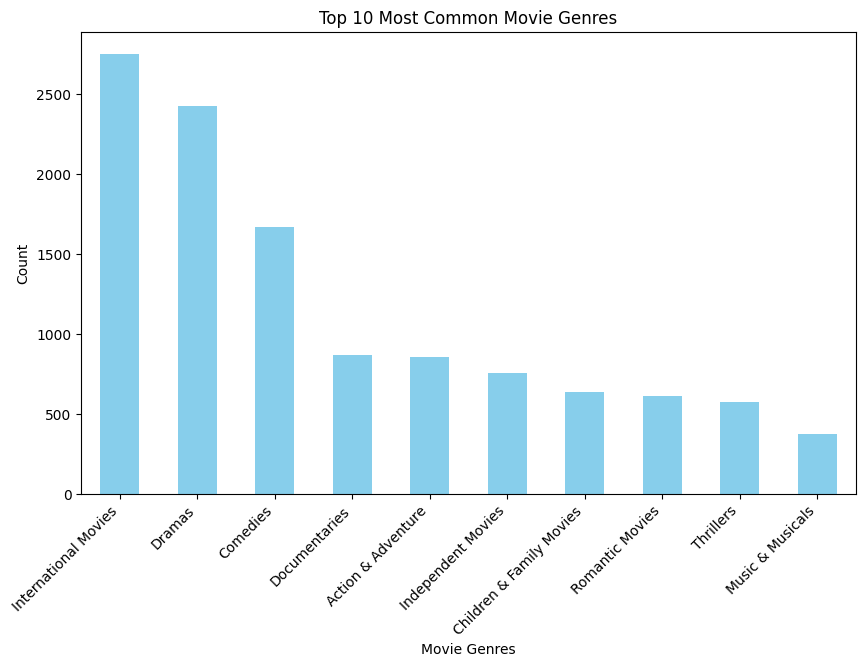

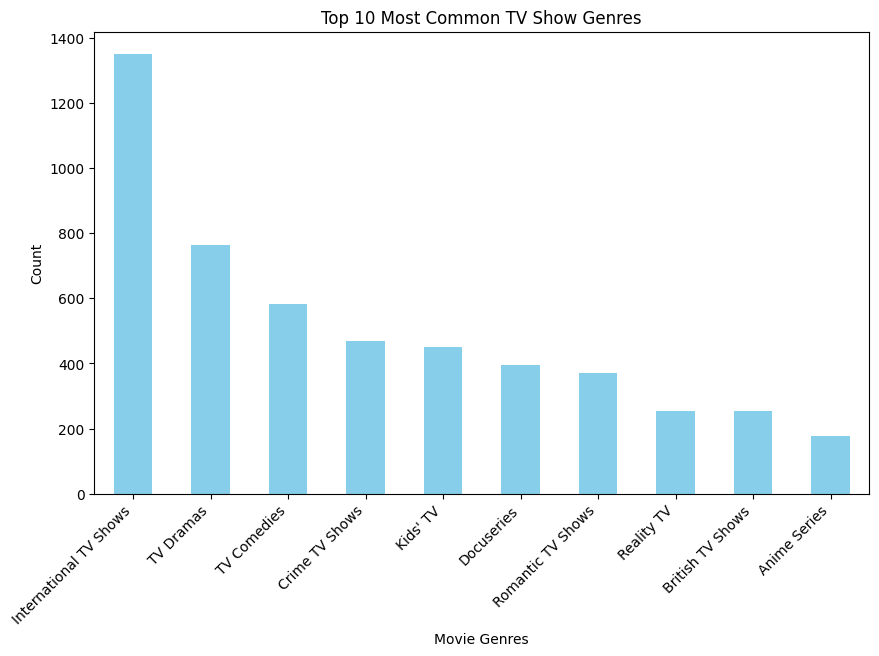

In [38]:
# Step 1: Split the 'listed_in' column into individual genres
df['listed_in'] = df['listed_in'].str.split(',')


# Separate movies and tv shows
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()


#Flatten the list of genres and count their occurrences
movie_genres =movies['listed_in'].explode().str.strip()  # Flatten and remove leading/trailing spaces
movie_genre_counts = movie_genres.value_counts()

# Visualize the most common genres
plt.figure(figsize=(10, 6))
movie_genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Movie Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# Flatten the list of genres and count their occurrences
tv_genres =tv_shows['listed_in'].explode().str.strip()  # Flatten and remove leading/trailing spaces
tv_genre_counts = tv_genres.value_counts()

# Visualize the most common genres
plt.figure(figsize=(10, 6))
tv_genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common TV Show Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

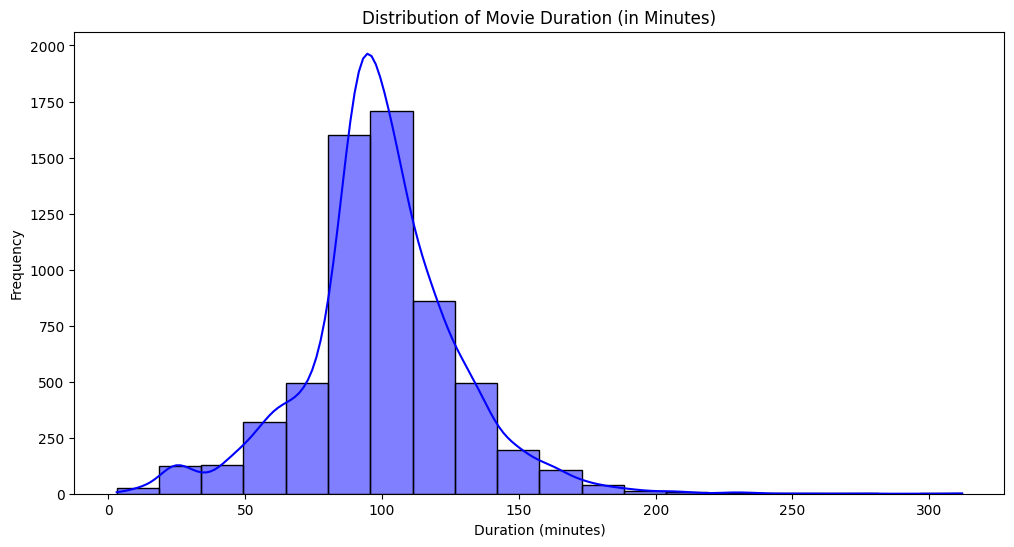

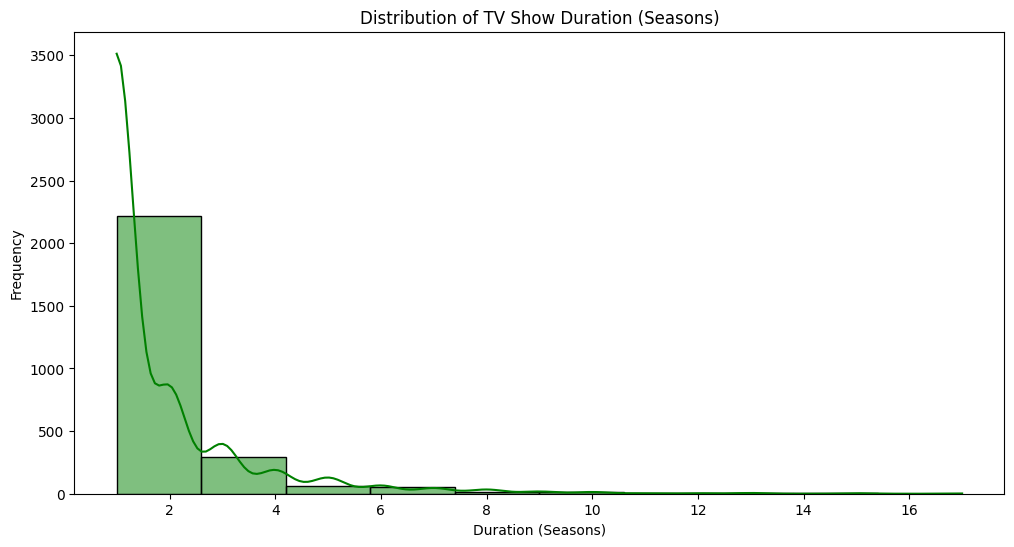

In [39]:

# Clean 'duration' for movies
movies['duration'] = movies['duration'].astype(str).str.replace(' min', '').astype(float)

# Clean 'duration' for TV shows (convert number of seasons to numeric)
tv_shows['duration'] = tv_shows['duration'].astype(str).str.extract('(\d+)').astype(float)
# tv_shows.head()

# Plot for Movies
plt.figure(figsize=(12, 6))
sns.histplot(movies['duration'], kde=True, color='blue', bins=20)
plt.title('Distribution of Movie Duration (in Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot for TV Shows
plt.figure(figsize=(12, 6))
sns.histplot(tv_shows['duration'], kde=True, color='green', bins=10)
plt.title('Distribution of TV Show Duration (Seasons)')
plt.xlabel('Duration (Seasons)')
plt.ylabel('Frequency')
plt.show()


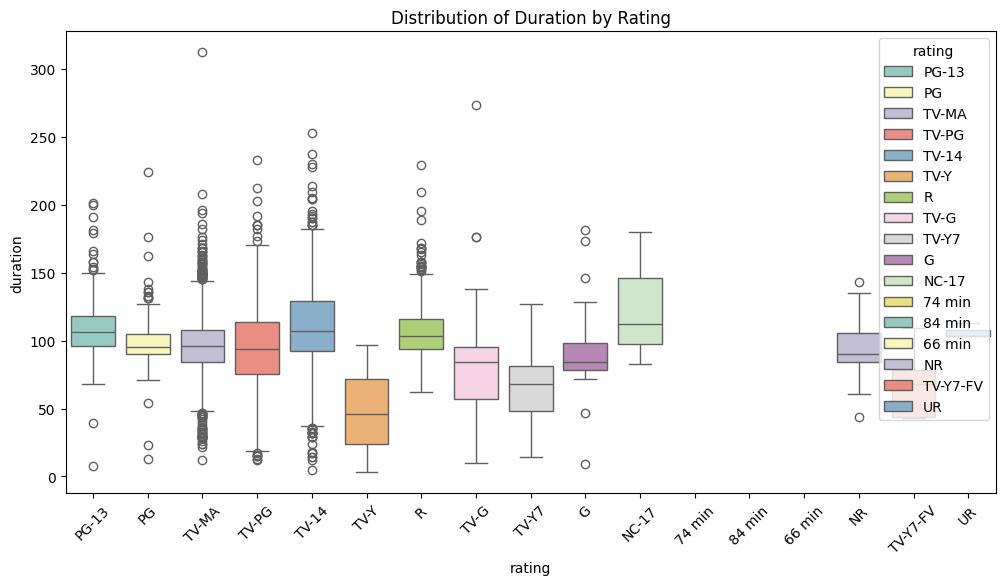

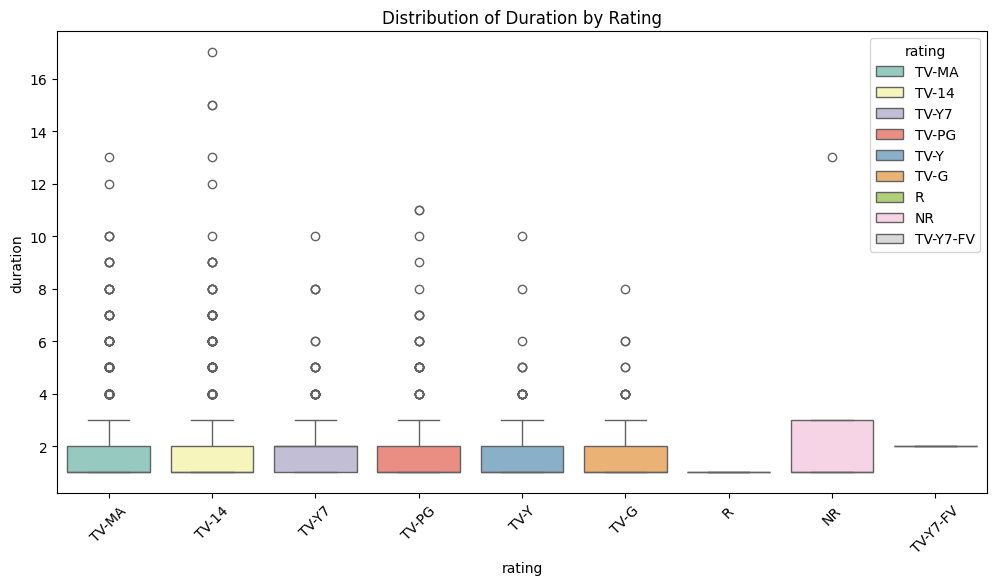

In [40]:
# Duration & rating 
# Plot for Movies
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, x='rating', y='duration', palette='Set3', hue='rating')
plt.title('Distribution of Duration by Rating')
plt.xticks(rotation=45)
plt.show()


# Plot for TV Shows
plt.figure(figsize=(12, 6))
sns.boxplot(data=tv_shows, x='rating', y='duration', palette='Set3', hue='rating')
plt.title('Distribution of Duration by Rating')
plt.xticks(rotation=45)
plt.show()
